This will print any graphs or tables in epyc-lab

In [8]:
%matplotlib inline

A few import statments of things that we will use

In [2]:
import lsst.afw.display as afwDisplay #Code to display images
afwDisplay.setDefaultBackend('matplotlib')
import lsst.afw.geom as afwGeom #represents irregular regions of pixels
import lsst.daf.persistence as dafPersist

In [9]:
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Butler provides a generic mechanism for persisting and retrieving data using mappers

In [61]:
repo = '/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1'
butler = dafPersist.Butler(repo)

In [5]:
dbName = 'association.db'
dbPath = os.path.join(repo, dbName)

In [18]:
testDataId = {'visit': 410915, 'ccdnum': 47}

In [19]:
processedImage = butler.get('calexp', dataId=testDataId)


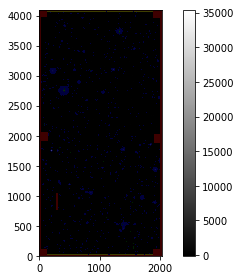

In [20]:
display = afwDisplay.Display(frame=1)
display.mtv(processedImage)
display.setMaskTransparency(50)
display.scale('asinh', 'zscale', Q=8)
display.show_colorbar()

In [22]:
differenceImage = butler.get('deepDiff_differenceExp', dataId=testDataId)

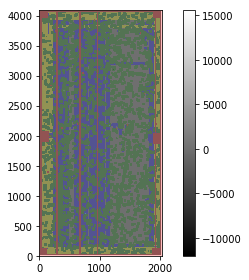

In [23]:
display2 = afwDisplay.Display(frame=2)
display2.mtv(differenceImage)
display2.setMaskTransparency(50)
display2.scale('asinh', 'zscale', Q=8)
display2.show_colorbar()

In [48]:
data = {'visit' : 412620, 'ccdnum':32, 'filter': 'HSC _R'}

In [49]:
calexp = butler.get('calexp', dataId=data)

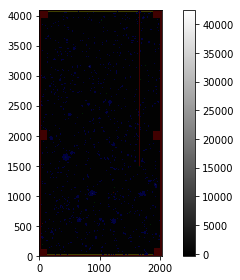

In [65]:

display = afwDisplay.Display(frame=1)
display.mtv(calexp)
display.setMaskTransparency(70)
display.scale('asinh', 'zscale', Q=8)
display.show_colorbar()
display.scale("asinh", -1, 30)


In [54]:
mask = calexp.getMask()
for maskName, maskBit in mask.getMaskPlaneDict().items():
    print('{}: {}'.format(maskName, display.getMaskPlaneColor(maskName)))

BAD: red
CLIPPED: None
CR: magenta
DETECTED: blue
DETECTED_NEGATIVE: cyan
EDGE: yellow
INEXACT_PSF: None
INTRP: green
NOT_DEBLENDED: None
NO_DATA: orange
REJECTED: None
SAT: green
SENSOR_EDGE: None
SUSPECT: yellow
UNMASKEDNAN: None


In [57]:
src = butler.get('src', dataId=data)

In [58]:
print(len(src))

1526


In [60]:
print(src.getSchema().getNames())

{'base_SdssShape_x', 'deblend_deblendedAsPsf', 'base_CircularApertureFlux_17_0_flag_apertureTruncated', 'base_SdssCentroid_flag_edge', 'base_CircularApertureFlux_25_0_flag', 'base_CircularApertureFlux_35_0_instFlux', 'base_Blendedness_abs_child_xy', 'base_Variance_flag_emptyFootprint', 'calib_psf_candidate', 'base_PixelFlags_flag_saturated', 'base_LocalBackground_flag_noPsf', 'base_Blendedness_raw_parent_xy', 'base_GaussianFlux_instFluxErr', 'base_CircularApertureFlux_12_0_flag_apertureTruncated', 'base_SdssCentroid_y', 'base_GaussianFlux_instFlux', 'base_CircularApertureFlux_35_0_instFluxErr', 'base_SdssCentroid_flag_almostNoSecondDerivative', 'base_PixelFlags_flag', 'base_CDMatrix_2_1', 'base_PsfFlux_area', 'base_Variance_value', 'base_SdssCentroid_flag_noSecondDerivative', 'base_PixelFlags_flag_interpolatedCenter', 'base_CircularApertureFlux_12_0_instFlux', 'base_SdssCentroid_flag', 'base_CircularApertureFlux_3_0_flag', 'coord_dec', 'deblend_hasStrayFlux', 'base_SdssCentroid_flag_no

KeyError: "Field with name 'calib_psfCandidate' not found"